In [144]:
G11 = nx.MultiDiGraph()

filtered_df = df.iloc[0:179]

for publisher in unique_publishers:
        G11.add_node(publisher, publications = [])
    
for specific_publisher in G11.nodes():
    for title, year, edition, publisher, translator, place in zip(titles, years, editions, publishers, translators, places):
        if specific_publisher in publisher:
            G11.nodes[specific_publisher]['publications'].append({'title': title, 'years': year, 'editions': [edition], 'publisher': publisher, 'translator': translator, 'place': place})

for publisher in G11.nodes():
    magnitude = sum(sum(pub['editions']) for pub in G11.nodes[publisher]['publications'])
    G11.nodes[publisher]['magnitude'] = magnitude


In [145]:
def add_edges_between_publishers(G, publisher_A, publisher_B, publication_A, publication_B):
    years_A = publication_A['years']
    years_B = publication_B['years']
    translators_A = publication_A['translator']
    translators_B = publication_B['translator']
    
    if not pd.isna(translators_A) and not pd.isna(translators_B):
                same_translator = ((translators_A == translators_B) or (translators_A in translators_B) or (translators_B in translators_A))
    else:
                same_translator = False
            
    if pd.isna(translators_A) or 'not named' in translators_A or 'not mentioned' in translators_A or 'None' in translators_A:
                same_translator = False
    if pd.isna(translators_B) or 'not named' in translators_B or 'not mentioned' in translators_B or 'None' in translators_B:
                same_translator = False
    
    # Check for copublication relation
    if publication_A['publisher'] == publication_B['publisher'] and publication_A['title'] == publication_B['title'] and set(years_A) == set(years_B):
        weight = max(publication_A['editions'], publication_B['editions'])
        # Add copublication edge with a unique key based on the relation type
        edge_key = f"copub_{publisher_A}_{publisher_B}_{publication_A['title']}"
        add_edge_with_attributes(G, publisher_A, publisher_B, publication_A['title'], 
                                 years_A, years_B, translators_A, translators_B,
                                 publication_A['editions'], publication_B['editions'],
                                 publication_A['place'], publication_B['place'],
                                 weight, 'copublication', key=edge_key)

    # Check for reprint relation
    if translators_A == translators_B and publication_A['title'] == publication_B['title'] and years_A and years_B and years_A[0] < years_B[0] and publication_A['publisher'] != publication_B['publisher']:
        weight = publication_B['editions']
        # Add reprint edge with a unique key based on the relation type
        edge_key = f"reprint_{publisher_A}_{publisher_B}_{publication_A['title']}"
        add_edge_with_attributes(G, publisher_A, publisher_B, publication_A['title'], 
                                 years_A, years_B, translators_A, translators_B,
                                 publication_A['editions'], publication_B['editions'],
                                 publication_A['place'], publication_B['place'],
                                 weight, 'reprint', key=edge_key)

    # Check for retranslation relation
    if translators_A != translators_B and publication_A['title'] == publication_B['title'] and years_A and years_B and years_A[0] < years_B[0] and publication_A['publisher'] != publication_B['publisher']:
        weight = publication_B['editions']
        # Add retranslation edge with a unique key based on the relation type
        edge_key = f"retrans_{publisher_A}_{publisher_B}_{publication_A['title']}"
        add_edge_with_attributes(G, publisher_A, publisher_B, publication_A['title'], 
                                 years_A, years_B, translators_A, translators_B,
                                 publication_A['editions'], publication_B['editions'],
                                 publication_A['place'], publication_B['place'],
                                 weight, 'retranslation', key=edge_key)

# Iterate over combinations of nodes (publishers)
for publisher_A, publisher_B in itertools.combinations(G11.nodes(), 2):
    publications_A = G11.nodes[publisher_A]["publications"]
    publications_B = G11.nodes[publisher_B]["publications"]
    
    # Iterate over publications of each publisher pair
    for publication_A in publications_A:
        for publication_B in publications_B:
            # Add edges based on different relations
            add_edges_between_publishers(G11, publisher_A, publisher_B, publication_A, publication_B)


In [146]:
filtered_df

,Year,Earlier,Subsequent Listing,Number of Editions,Digitised,Database Link,Edition,Author,Gender,Religious Au,...,Approbation,End Matter,Images,Notes,Full Title,Place of Publication,Source Lg.,Original - Title,Original - Pub. Place,Original - Year
0,1846,NaN,NaN,1.0,NaN,NaN,NaN,"Liguori, Alfonso Maria de', Saint, 1696-1787",male,Yes (Saint),...,NaN,NaN,NaN,NaN,NaN,Dublin,Italian,NaN,NaN,NaN
1,1853,NaN,NaN,1.0,NaN,NaN,NaN,"Liguori, Alfonso Maria de', Saint, 1696-1787",male,Yes (Saint),...,NaN,NaN,NaN,Worldcat,NaN,Dublin,NaN,NaN,NaN,NaN
2,1873,NaN,NaN,1.0,NaN,NaN,NaN,"Liguori, Alfonso Maria de', Saint, 1696-1787",male,Yes (Saint),...,NaN,NaN,NaN,Worldcat,NaN,Dublin,NaN,NaN,NaN,NaN
3,1859,NaN,NaN,1.0,NaN,NaN,NaN,"Liguori, Alfonso Maria de', Saint, 1696-1787",male,Yes (Saint),...,NaN,NaN,NaN,Worldcat,NaN,New York; Montreal,NaN,NaN,NaN,NaN
4,1872,NaN,NaN,1.0,NaN,NaN,NaN,"Liguori, Alfonso Maria de', Saint, 1696-1787",male,Yes (Saint),...,NaN,NaN,NaN,Worldcat,NaN,Einsiedeln,NaN,Esercizio della via crucis,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,1845,NaN,NaN,NaN,NaN,NaN,NaN,"Liguori, Alfonso Maria de', Saint, 1696-1805",male,yes (Priest),...,NaN,NaN,NaN,All works had been published separately in the...,NaN,Dublin,NaN,NaN,NaN,NaN
175,1888,NaN,NaN,NaN,NaN,NaN,NaN,"Liguori, Alfonso Maria de', Saint, 1696-1806",male,yes (Priest),...,NaN,NaN,NaN,Worldcat,NaN,New York,NaN,NaN,NaN,NaN
176,1852,NaN,NaN,NaN,NaN,NaN,NaN,"Liguori, Alfonso Maria de', Saint, 1696-1808",male,yes (Priest),...,NaN,NaN,frontispiece portrait,Worldcat,NaN,Baltimore; Pittsburg,NaN,NaN,NaN,NaN
177,1872,NaN,NaN,NaN,NaN,NaN,NaN,"Liguori, Alfonso Maria de', Saint, 1696-1809",male,yes (Priest),...,NaN,NaN,NaN,Worldcat,NaN,New York,NaN,NaN,NaN,NaN


In [147]:
len(G11.edges())

209

In [59]:
for u, v, data in G11.edges(data=True):
    weight = data['weight']
    print(weight)

[1]
[1]
[2]
[1]
[1]
[1]
[3]
[4]
[1]
[1]
[2]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[2]
[2]
[2]
[2]
[2]
[1]
[2]
[3]
[1]
[3]
[1]
[4]
[1]
[4]
[5]
[1]
[6]
[1]
[1]
[2]
[2]
[1]
[5]
[1]
[1]
[6]
[1]
[1]
[1]
[1]
[1]
[1]
[2]
[1]
[2]
[2]
[3]
[1]
[1]
[1]
[1]
[6]
[1]
[2]
[5]
[3]
[1]
[3]
[1]
[1]
[2]
[5]
[3]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[2]
[1]
[1]
[6]
[1]
[1]
[1]
[1]
[1]
[2]
[1]
[2]
[2]
[2]
[2]
[3]
[1]
[3]
[1]
[1]
[3]
[3]
[1]
[1]
[5]
[1]
[1]
[1]
[1]
[1]
[2]
[2]
[1]
[3]
[1]
[1]
[1]
[1]
[1]
[2]
[2]
[1]
[2]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[6]
[1]
[2]
[1]
[2]
[2]
[2]
[1]
[1]
[1]
[2]
[1]
[2]
[2]
[2]
[1]
[1]
[1]
[1]
[2]
[1]
[1]
[2]
[3]
[1]
[1]
[1]
[2]
[1]
[3]
[1]
[1]
[1]
[1]
[1]
[2]
[2]
[3]
[3]
[3]
[2]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[2]
[2]
[3]
[3]
[3]
[2]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[2]
[2]
[3]
[3]
[3]
[2]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


In [8]:
sorted_nodes = sorted(G.nodes(data=True), key=lambda x: x[1].get('magnitude', 0), reverse=True)

# Print nodes in descending order of magnitude
for node, attrs in sorted_nodes:
    print(f"{node}, Magnitude: {attrs.get('magnitude', 0)}")

James Duffy, Magnitude: 90
Benziger Brothers, Magnitude: 52
J. Murphy, Magnitude: 32
M.H. Gill & Sons, Magnitude: 25
T. Washbourne, Magnitude: 23
B. Herder, Magnitude: 19
Edward Dunigan & Brother, Magnitude: 17
Fr. Pustet, Magnitude: 16
C. Wildermann, Magnitude: 15
P.J. Kenedy, Magnitude: 13
Fielding Lucas, JR., Magnitude: 11
P. O'Shea, Magnitude: 10
D. & J. Sadlier & Co., Magnitude: 9
John Coyne, Magnitude: 8
Richard Grace, Magnitude: 7
Catholic Publication Society, Magnitude: 7
H. & C. McGrath, Magnitude: 6
P. Donahoe, Magnitude: 6
Thomas Sweeney, Magnitude: 4
Redemptorist fathers, Magnitude: 4
Burns and Oates, Magnitude: 4
J.B. Piet, Magnitude: 4
J.B. Kirker, Magnitude: 4
Webb and Levering, Magnitude: 3
P. J. Kenedy, Magnitude: 3
Uknown, Magnitude: 2
P.F. Cunningham, Magnitude: 2
T.W. Strong, Magnitude: 2
Augustin Coté & Co., Magnitude: 2
C.M. Warren, Magnitude: 2
Thomas Richardson & Son, Magnitude: 1
William McSorley & Co., Magnitude: 1
J. P. Walsh, Magnitude: 1
M. Sullivan, Magnit

In [83]:
#import networkx as nx

out_degrees = dict(G11.out_degree())
in_degrees = dict(G11.in_degree())
overall_degrees = {node: out_degrees.get(node, 0) + in_degrees.get(node, 0) for node in G11.nodes()}

nodes_by_out_degree = sorted(out_degrees, key=out_degrees.get, reverse=True)
nodes_by_in_degree = sorted(in_degrees, key=in_degrees.get, reverse=True)
nodes_by_overall_degree = sorted(overall_degrees, key=overall_degrees.get, reverse=True)

print("Nodes ordered by outgoing degree:")
for node in nodes_by_out_degree:
    print(node, out_degrees[node])

print("\nNodes ordered by incoming degree:")
for node in nodes_by_in_degree:
    print(node, in_degrees[node])

print("\nNodes ordered by overall degree:")
for node in nodes_by_overall_degree:
    print(node, overall_degrees[node])

Nodes ordered by outgoing degree:
James Duffy 30
Benziger Brothers 28
P.J. Kenedy 17
M.H. Gill & Sons 14
John Coyne 13
Richard Grace 12
Thomas Sweeney 11
Catholic Publication Society 10
J.B. Kirker 8
Flynn & Mahony 7
P. Donahoe 7
Burns and Oates 6
E. Cummiskey 5
D. & J. Sadlier & Co. 5
C. Wildermann 5
P. O'Shea 5
T.B. Noonan 4
M.T. Cozans 3
D. O'Halloran 3
J. Murphy 3
T.W. Strong 3
Fielding Lucas, JR. 3
Uknown 2
Fr. Pustet 1
M. Sullivan 1
B. Herder 1
J.B. Piet 1
Webb and Levering 1
Thomas Richardson & Son 0
William McSorley & Co. 0
J. P. Walsh 0
J. and C. Mozley 0
George Quigley & Co 0
Redemptorist fathers 0
P.F. Cunningham 0
H. & C. McGrath 0
Paulist Press 0
Augustin Coté & Co. 0
C.M. Warren 0
P. J. Kenedy 0
Catholic Press Association 0
John J. Bodkin 0
J.M. O'Toole 0
T. Washbourne 0
THE REFORMATION SOCIETY 0
J.B. Lippincott 0
Felix O'Rourke 0
Edward Dunigan & Brother 0

Nodes ordered by incoming degree:
Benziger Brothers 46
T. Washbourne 31
Edward Dunigan & Brother 20
M.H. Gill & Son

In [74]:
G11.edges('P.J. Kenedy', 'Burns and Oates', keys = True)

OutMultiEdgeDataView([('P.J. Kenedy', 'J. Murphy', 'retrans_P.J. Kenedy_J. Murphy_Preparation for Death', None), ('P.J. Kenedy', 'Redemptorist fathers', 'retrans_P.J. Kenedy_Redemptorist fathers_Preparation for Death', None), ('P.J. Kenedy', "P. O'Shea", "retrans_P.J. Kenedy_P. O'Shea_The Glories of Mary", None), ('P.J. Kenedy', 'Burns and Oates', 'retrans_P.J. Kenedy_Burns and Oates_The mysteries of the incarnation', None), ('P.J. Kenedy', 'Burns and Oates', 'retrans_P.J. Kenedy_Burns and Oates_The Glories of Mary', None), ('P.J. Kenedy', 'J.B. Kirker', 'reprint_P.J. Kenedy_J.B. Kirker_The mysteries of the incarnation', None), ('P.J. Kenedy', 'J.B. Kirker', 'reprint_P.J. Kenedy_J.B. Kirker_The holy eucharist', None), ('P.J. Kenedy', 'Benziger Brothers', 'retrans_P.J. Kenedy_Benziger Brothers_The mysteries of the incarnation', None), ('P.J. Kenedy', 'Benziger Brothers', 'retrans_P.J. Kenedy_Benziger Brothers_A Short Treatise on Prayer', None), ('P.J. Kenedy', 'Benziger Brothers', 'retr

In [81]:
G11.edges('P.J. Kenedy', data = True)

OutMultiEdgeDataView([('P.J. Kenedy', 'J. Murphy', {'title': 'Preparation for Death', 'source_years': [1857], 'target_years': [1869], 'source_translator': 'Rev. Robert A. Coffin', 'target_translator': nan, 'source_num_editions': [1], 'target_num_editions': [1], 'source_place': [['New York']], 'target_place': [['Baltimore']], 'weight': [1], 'relation': 'retranslation'}), ('P.J. Kenedy', 'Redemptorist fathers', {'title': 'Preparation for Death', 'source_years': [1857], 'target_years': [1926], 'source_translator': 'Rev. Robert A. Coffin', 'target_translator': 'Rev. Eugene Grimm', 'source_num_editions': [1], 'target_num_editions': [1], 'source_place': [['New York']], 'target_place': [['Brooklyn, St Louis']], 'weight': [1], 'relation': 'retranslation'}), ('P.J. Kenedy', "P. O'Shea", {'title': 'The Glories of Mary', 'source_years': [1852, 1888, 1889, 1894], 'target_years': [1873, 1876, 1877, 1879, 1890], 'source_translator': 'not named', 'target_translator': 'Rev. Robert A. Coffin', 'source_

In [69]:
G11.successors('Benziger Brothers')

In [82]:
node = 'Benziger Brothers'

for node_id in G11.successors(node):
    print(node_id)

M.H. Gill & Sons
T. Washbourne


In [84]:
node1 = 'James Duffy'

for node_id in G11.successors(node1):
    print(node_id)

Thomas Sweeney
Redemptorist fathers
H. & C. McGrath
T.W. Strong
P. O'Shea
Burns and Oates
Fielding Lucas, JR.
J.B. Kirker
P. Donahoe
Benziger Brothers
Webb and Levering
C.M. Warren
Catholic Press Association
M.H. Gill & Sons
T. Washbourne
J.B. Lippincott
Edward Dunigan & Brother


In [87]:

# Nodes of interest
node1 = 'M.H. Gill & Sons'
node2 = 'Benziger Brothers'

# Initialize a list to store weights of edges between node1 and node2
weights = []

# Iterate over all edges in the graph
for u, v, key, attr in G11.edges(keys=True, data=True):
    # Check if the edge is between node1 and node2
    if (u == node1 and v == node2) or (u == node2 and v == node1):
        # Extract weight from the edge attributes
        weight = attr['weight']
        weights.append(weight)

# Now 'weights' list contains all edge weights between node1 and node2
print("Weights of edges between '{}' and '{}':".format(node1, node2), weights)


Weights of edges between 'M.H. Gill & Sons' and 'Benziger Brothers': [[1], [2], [2], [3], [3], [3], [2], [1], [1], [1], [1], [1], [1], [1]]


In [88]:
node = 'Benziger Brothers'

successors = []

for node_id in G11.successors(node):
    successors.append(node_id)
    
weights = []

# Iterate over all edges in the graph
for u, v, key, attr in G11.edges(keys=True, data=True):
    # Check if the edge is between node1 and node2
    if (u in successors and v == node) or (u == node and v in successors):
        # Extract weight from the edge attributes
        weight = attr['weight']
        weights.append(weight)

In [89]:
weights

[[1],
 [2],
 [2],
 [3],
 [3],
 [3],
 [2],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [2],
 [2],
 [3],
 [3],
 [3],
 [2],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1]]

In [91]:
   
weights = []

outgoing_weighted_degrees = {}
incoming_weighted_degrees = {}
overall_weighted_degrees = {}

for node in G11.nodes():
    successors = []
    for node_id in G11.successors(node):
        successors.append(node_id)
    weights = []
    for u, v, key, attr in G11.edges(keys=True, data=True):
        if (u in successors and v == node) or (u == node and v in successors):
            weight = attr['weight']
            weights.append(sum(weight))
    #outgoing_weight = sum(sum(G11.edges[node, neighbor]['weight']) for neighbor in G11.successors(node))
    outgoing_weighted_degrees[node] = sum(weights)

for node in G11.nodes():
    predecessors = []
    for node_id in G11.predecessors(node):
        predecessors.append(node_id)
    weights = []
    for u, v, key, attr in G11.edges(keys=True, data=True):
        if (u in predecessors and v == node) or (u == node and v in predecessors):
            weight = attr['weight']
            weights.append(sum(weight))
    #incoming_weight = sum(sum(G11.edges[neighbor, node]['weight']) for neighbor in G11.predecessors(node))
    incoming_weighted_degrees[node] = sum(weights)

for node in G11.nodes():
    overall_weighted_degree = outgoing_weighted_degrees.get(node, 0) + incoming_weighted_degrees.get(node, 0)
    overall_weighted_degrees[node] = overall_weighted_degree

sorted_outgoing_weighted_degrees = dict(sorted(outgoing_weighted_degrees.items(), key=lambda item: item[1], reverse=True))
sorted_incoming_weighted_degrees = dict(sorted(incoming_weighted_degrees.items(), key=lambda item: item[1], reverse=True))
sorted_overall_weighted_degrees = dict(sorted(overall_weighted_degrees.items(), key=lambda item: item[1], reverse=True))

print("Outgoing Weighted Degrees:", sorted_outgoing_weighted_degrees)
print("Incoming Weighted Degrees:", sorted_incoming_weighted_degrees)
print("Overall Weighted Degrees:", sorted_overall_weighted_degrees)


Outgoing Weighted Degrees: {'James Duffy': 53, 'Benziger Brothers': 46, 'John Coyne': 34, 'P.J. Kenedy': 27, 'M.H. Gill & Sons': 23, 'Richard Grace': 19, 'E. Cummiskey': 15, 'Thomas Sweeney': 15, 'Catholic Publication Society': 14, 'Flynn & Mahony': 13, 'J.B. Kirker': 12, 'Burns and Oates': 10, 'P. Donahoe': 10, 'T.W. Strong': 9, 'D. & J. Sadlier & Co.': 8, "P. O'Shea": 8, 'M.T. Cozans': 7, "D. O'Halloran": 7, 'C. Wildermann': 5, 'J. Murphy': 4, 'T.B. Noonan': 4, 'Uknown': 3, 'Fielding Lucas, JR.': 3, 'M. Sullivan': 2, 'Fr. Pustet': 1, 'B. Herder': 1, 'J.B. Piet': 1, 'Webb and Levering': 1, 'Thomas Richardson & Son': 0, 'William McSorley & Co.': 0, 'J. P. Walsh': 0, 'J. and C. Mozley': 0, 'George Quigley & Co': 0, 'Redemptorist fathers': 0, 'P.F. Cunningham': 0, 'H. & C. McGrath': 0, 'Paulist Press': 0, 'Augustin Coté & Co.': 0, 'C.M. Warren': 0, 'P. J. Kenedy': 0, 'Catholic Press Association': 0, 'John J. Bodkin': 0, "J.M. O'Toole": 0, 'T. Washbourne': 0, 'THE REFORMATION SOCIETY': 0,

In [92]:
from collections import Counter


source_place_counter = Counter()
target_place_counter = Counter()
overall_place_counter = Counter()


for publisher_A, publisher_B, data in G11.edges(data=True):
    if isinstance(data['source_place'], list):
        source_places = data['source_place']
    else:
        source_places = [data['source_place']]
    if isinstance(data['target_place'], list):
        target_places = data['target_place']
    else:
        target_places = [data['target_place']]

    
    for i, place_list in enumerate(source_places):
        if isinstance(place_list, str):
            source_places[i] = [place_list]
    
    for i, place_list in enumerate(target_places):
        if isinstance(place_list, str):
            #place_list = [place_list]
            target_places[i] = [place_list]
            
    for place_list in source_places:
        for place in place_list:
            source_place_counter[place] += 1
            
    for place_list in target_places:
        for place in place_list:
            target_place_counter[place] += 1
    
    for place_list in source_places + target_places:
        #if isinstance(place_list, str):
            #place_list = [place_list]  # Convert string to list
        for place in place_list:
            overall_place_counter[place] += 1


sorted_source_places = source_place_counter.most_common()
sorted_target_places = target_place_counter.most_common()
sorted_overall_places = overall_place_counter.most_common()


print("Sorted Source Places:", sorted_source_places)
print("Sorted Target Places:", sorted_target_places)
print("Sorted Overall Places:", sorted_overall_places)

Sorted Source Places: [('New York', 111), ('Dublin', 94), ('London', 53), ('Cincinnati', 42), ('Chicago', 42), ('Boston', 36), ('Baltimore', 7), ('Philadelphia', 5), ('Montreal', 5), ('St. Paul, Minn.', 3), ('nan', 2), ('', 2), ('Pittsburg', 1), ('St. Louis', 1), ('Louisville', 1)]
Sorted Target Places: [('New York', 154), ('Cincinnati', 80), ('Chicago', 80), ('London', 65), ('Dublin', 60), ('Boston', 10), ('Philadelphia', 10), ('Louisville', 5), ('Baltimore', 4), ('Brooklyn, St Louis', 4), ('Los Angeles', 3), ('Quebec', 2), ('nan', 1), ('Pittsburg', 1), ('St. Louis', 1), ('Einsiedeln', 1)]
Sorted Overall Places: [('New York', 265), ('Dublin', 154), ('Cincinnati', 122), ('Chicago', 122), ('London', 118), ('Boston', 46), ('Philadelphia', 15), ('Baltimore', 11), ('Louisville', 6), ('Montreal', 5), ('Brooklyn, St Louis', 4), ('Los Angeles', 3), ('nan', 3), ('St. Paul, Minn.', 3), ('', 2), ('Pittsburg', 2), ('St. Louis', 2), ('Quebec', 2), ('Einsiedeln', 1)]


In [21]:
publisher_C = "James Duffy"
publisher_D = "Benziger Brothers"

for publisher_C, publisher_D, data in G.edges(data=True):
    weight = data['weight']
    print(weight)

[1]
[1]
[2]
[1]
[4]
[1]
[2]
[1]
[1]
[1]
[1]
[1]
[2]
[2]
[2]
[2]
[1]
[2]
[3]
[1]
[3]
[1]
[1]
[4]
[1]
[6]
[1]
[1]
[1]
[5]
[1]
[1]
[6]
[1]
[1]
[2]
[3]
[1]
[1]
[1]
[1]
[6]
[1]
[2]
[5]
[3]
[1]
[3]
[1]
[1]
[2]
[5]
[3]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[2]
[1]
[3]
[1]
[1]
[3]
[3]
[1]
[1]
[1]
[1]
[1]
[2]
[1]
[3]
[1]
[1]
[1]
[1]
[2]
[2]
[2]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[6]
[1]
[2]
[1]
[2]
[1]
[1]
[2]
[2]
[2]
[1]
[1]
[1]
[1]
[2]
[2]
[3]
[1]
[1]
[1]
[3]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


In [93]:
source_place_counter_weighted = Counter()
target_place_counter_weighted = Counter()
overall_place_counter_weighted = Counter()

for publisher_A, publisher_B, data in G11.edges(data=True):
    # Get the weight of the current edge
    weight = data['weight']
    
    if isinstance(data['source_place'], list):
        source_places = data['source_place']
    else:
        source_places = [data['source_place']]
    if isinstance(data['target_place'], list):
        target_places = data['target_place']
    else:
        target_places = [data['target_place']]

    for i, place_list in enumerate(source_places):
        if isinstance(place_list, str):
            source_places[i] = [place_list]

    for i, place_list in enumerate(target_places):
        if isinstance(place_list, str):
            target_places[i] = [place_list]

    for place_list in source_places:
        for place in place_list:
            source_place_counter_weighted[place] += weight[0]

    for place_list in target_places:
        for place in place_list:
            target_place_counter_weighted[place] += weight[0]

    for place_list in source_places + target_places:
        for place in place_list:
            overall_place_counter_weighted[place] += weight[0]

sorted_source_places_weighted = source_place_counter_weighted.most_common()
sorted_target_places_weighted = target_place_counter_weighted.most_common()
sorted_overall_places_weighted = overall_place_counter_weighted.most_common()

print("Sorted Source Places (Weighted):", sorted_source_places_weighted)
print("Sorted Target Places (Weighted):", sorted_target_places_weighted)
print("Sorted Overall Places (Weighted):", sorted_overall_places_weighted)


Sorted Source Places (Weighted): [('New York', 183), ('Dublin', 166), ('London', 87), ('Cincinnati', 69), ('Chicago', 69), ('Boston', 52), ('Philadelphia', 15), ('Baltimore', 8), ('Montreal', 8), ('St. Paul, Minn.', 7), ('nan', 3), ('', 2), ('Pittsburg', 1), ('St. Louis', 1), ('Louisville', 1)]
Sorted Target Places (Weighted): [('New York', 261), ('Cincinnati', 136), ('Chicago', 136), ('Dublin', 107), ('London', 104), ('Boston', 15), ('Louisville', 15), ('Philadelphia', 11), ('Baltimore', 4), ('Brooklyn, St Louis', 4), ('Quebec', 4), ('Los Angeles', 3), ('nan', 2), ('Pittsburg', 1), ('St. Louis', 1), ('Einsiedeln', 1)]
Sorted Overall Places (Weighted): [('New York', 444), ('Dublin', 273), ('Cincinnati', 205), ('Chicago', 205), ('London', 191), ('Boston', 67), ('Philadelphia', 26), ('Louisville', 16), ('Baltimore', 12), ('Montreal', 8), ('St. Paul, Minn.', 7), ('nan', 5), ('Brooklyn, St Louis', 4), ('Quebec', 4), ('Los Angeles', 3), ('', 2), ('Pittsburg', 2), ('St. Louis', 2), ('Einsied

In [94]:
#from collections import Counter

# Initialize counters for unweighted and weighted titles
unweighted_title_counter = Counter()
weighted_title_counter = Counter()

# Initialize dictionaries to store concatenated source and target places for each title
title_source_places = {}
title_target_places = {}

# Iterate over edges in the graph
for publisher_A, publisher_B, data in G11.edges(data=True):
    title = data['title']
    weight = data['weight']
    
    # Increment the unweighted and weighted title counters
    unweighted_title_counter[title] += 1
    weighted_title_counter[title] += weight[0]
    
    if isinstance(data['source_place'], list):
        source_places = data['source_place']
    else:
        source_places = [data['source_place']]
    if isinstance(data['target_place'], list):
        target_places = data['target_place']
    else:
        target_places = [data['target_place']]

    for i, place_list in enumerate(source_places):
        if isinstance(place_list, str):
            source_places[i] = [place_list]

    for i, place_list in enumerate(target_places):
        if isinstance(place_list, str):
            target_places[i] = [place_list]
    
    if title not in title_source_places:
                title_source_places[title] = [] 
            
    for place_list in source_places:
        for place in place_list:
            title_source_places[title].append(place)
    
    if title not in title_target_places:
                title_target_places[title] = [] 
            
    for place_list in target_places:
        for place in place_list:          
            title_target_places[title].append(place)

# Sort titles based on unweighted occurrences
sorted_unweighted_titles = unweighted_title_counter.most_common()

# Sort titles based on weighted occurrences
sorted_weighted_titles = weighted_title_counter.most_common()

for elem in sorted_unweighted_titles:
    #source_places = ', '.join(title_source_places[title])
    #target_places = ', '.join(title_target_places[title])
    #print(f"Title: {title} | Source Places: {source_places} | Target Places: {target_places}")
    print(f"Title and number of connections between publishers it occasioned: {elem} | Source Places: {set(title_source_places[elem[0]])} | Target Places: {set(title_target_places[elem[0]])}")

for ele in sorted_weighted_titles:
    #source_places = ', '.join(title_source_places[title])
    #target_places = ', '.join(title_target_places[title])
    print(f"Title and weighted number of connections between publishers it occasioned: {ele} | Source Places: {set(title_source_places[ele[0]])} | Target Places: {set(title_target_places[ele[0]])}")


Title and number of connections between publishers it occasioned: ('Preparation for Death', 34) | Source Places: {'Boston', 'Dublin', 'New York', 'Baltimore', 'Louisville'} | Target Places: {'Boston', 'Brooklyn, St Louis', 'Philadelphia', 'New York', 'Baltimore', 'Louisville'}
Title and number of connections between publishers it occasioned: ('Instructions on the Commandments', 28) | Source Places: {'Boston', 'Dublin', 'New York'} | Target Places: {'Boston', 'Cincinnati', 'Chicago', 'Dublin', 'New York'}
Title and number of connections between publishers it occasioned: ('The Glories of Mary', 26) | Source Places: {'Dublin', 'New York', 'London', 'Philadelphia'} | Target Places: {'Chicago', 'London', 'Cincinnati', 'Philadelphia', 'New York'}
Title and number of connections between publishers it occasioned: ('Visits to the Most Holy Sacrament', 10) | Source Places: {'Dublin', 'New York', 'nan'} | Target Places: {'nan', 'Cincinnati', 'Chicago', 'Dublin', 'New York'}
Title and number of co

In [95]:
G_combined = nx.DiGraph()

for u, v, key, attr in G11.edges(keys=True, data=True):
    if G_combined.has_edge(u, v):
        G_combined[u][v]['weight'] += sum(data['weight'])
    else:
        G_combined.add_edge(u, v, weight=sum(data['weight']))

for node, data in G11.nodes(data=True):
    if not G_combined.has_node(node):
        G_combined.add_node(node, magnitude=G.nodes[node].get('magnitude', 1))


In [96]:
len(G_combined.nodes())

48

In [97]:
len(G_combined.edges())

125

In [98]:
closeness_centralities = nx.closeness_centrality(G_combined)

betweenness_centralities = nx.betweenness_centrality(G_combined)

eigenvector_centralities = nx.eigenvector_centrality(G_combined)

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')

In [105]:
eigenvector_centralities = nx.eigenvector_centrality(G_combined, max_iter = 600)

In [215]:
betweenness_centralities

{'T.W. Strong': 0.0,
 'Benziger Brothers': 0.2135199595725911,
 'Burns and Oates': 0.008347792558318872,
 "P. O'Shea": 0.031637368479473744,
 'T.B. Noonan': 0.0,
 'Thomas Sweeney': 0.013821461189882237,
 'James Duffy': 0.23926755505702874,
 'Edward Dunigan & Brother': 0.07547988074303864,
 'C.M. Warren': 0.0030396504080714604,
 'Richard Grace': 0.0031526465736992047,
 'P.J. Kenedy': 0.028305271726324358,
 'Catholic Press Association': 0.0,
 'Fielding Lucas, JR.': 0.004933273354325986,
 'Uknown': 0.0,
 'Catholic Publication Society': 0.02576263892053366,
 'J.B. Kirker': 0.002144833723781092,
 'P. Donahoe': 0.016003684424737055,
 'J. Murphy': 0.04870568028462764,
 'J.B. Lippincott': 0.000122684333210649,
 'Webb and Levering': 0.000422579369947791,
 'Redemptorist fathers': 0.00735015471857577,
 'John Coyne': 0.006702654071075124,
 'E. Cummiskey': 0.00044984255510571296,
 'M. Sullivan': 0.0,
 'Fr. Pustet': 0.0,
 'John J. Bodkin': 0.005030739241265556,
 'George Quigley & Co': 0.0,
 'H. & C.

In [35]:
import operator

In [106]:
sorted_closeness = sorted(closeness_centralities.items(), key=operator.itemgetter(1), reverse=True)
sorted_betweenness = sorted(betweenness_centralities.items(), key=operator.itemgetter(1), reverse=True)
sorted_eigenvector = sorted(eigenvector_centralities.items(), key=operator.itemgetter(1), reverse=True)

In [107]:
sorted_closeness

[('Benziger Brothers', 0.42907801418439717),
 ('Edward Dunigan & Brother', 0.30260047281323876),
 ('T. Washbourne', 0.285007422068283),
 ('M.H. Gill & Sons', 0.267983789260385),
 ('C.M. Warren', 0.23771093176815847),
 ("P. O'Shea", 0.23167848699763594),
 ('J.B. Lippincott', 0.1797872340425532),
 ('Webb and Levering', 0.16125419932810747),
 ('Burns and Oates', 0.16090425531914893),
 ('P. Donahoe', 0.15143929912390489),
 ('Augustin Coté & Co.', 0.14960106382978725),
 ('J.B. Kirker', 0.13297872340425532),
 ('Redemptorist fathers', 0.13297872340425532),
 ('Catholic Press Association', 0.12310030395136778),
 ('James Duffy', 0.10638297872340426),
 ('T.W. Strong', 0.09477756286266924),
 ('Fielding Lucas, JR.', 0.07659574468085105),
 ('Thomas Sweeney', 0.07659574468085105),
 ('John J. Bodkin', 0.07598784194528875),
 ('H. & C. McGrath', 0.06963249516441004),
 ('P.J. Kenedy', 0.06382978723404255),
 ('J. Murphy', 0.048632218844984795),
 ('George Quigley & Co', 0.044326241134751775),
 ('Catholic P

In [108]:
sorted_betweenness

[('James Duffy', 0.0240518038852914),
 ('Benziger Brothers', 0.012642614862781376),
 ('P.J. Kenedy', 0.010484119642306505),
 ("P. O'Shea", 0.008325624421831638),
 ('P. Donahoe', 0.0034690101757631825),
 ('J. Murphy', 0.0018501387604070306),
 ('Burns and Oates', 0.0016959605303731114),
 ('J.B. Kirker', 0.0016188714153561518),
 ('Thomas Sweeney', 0.001156336725254394),
 ('Catholic Publication Society', 0.0008479802651865556),
 ('C. Wildermann', 0.00046253469010175765),
 ('B. Herder', 0.00046253469010175765),
 ('Fr. Pustet', 0.0),
 ('John J. Bodkin', 0.0),
 ('Richard Grace', 0.0),
 ('Uknown', 0.0),
 ('Fielding Lucas, JR.', 0.0),
 ('Catholic Press Association', 0.0),
 ('Edward Dunigan & Brother', 0.0),
 ('M.H. Gill & Sons', 0.0),
 ('T. Washbourne', 0.0),
 ('M. Sullivan', 0.0),
 ('M.T. Cozans', 0.0),
 ('John Coyne', 0.0),
 ('E. Cummiskey', 0.0),
 ('T.W. Strong', 0.0),
 ('C.M. Warren', 0.0),
 ('Redemptorist fathers', 0.0),
 ('Webb and Levering', 0.0),
 ('J.B. Lippincott', 0.0),
 ("D. O'Hallo

In [116]:
sorted_eigenvector

[('T. Washbourne', 0.9998418520990682),
 ('M.H. Gill & Sons', 0.012729171775440909),
 ('J.B. Lippincott', 0.012416247383425803),
 ('Benziger Brothers', 0.00014042117216996064),
 ('C.M. Warren', 0.00013750505325738524),
 ('Edward Dunigan & Brother', 0.00013628370816929231),
 ('Webb and Levering', 0.00013627610235015215),
 ('Augustin Coté & Co.', 2.4715479120301274e-06),
 ('P. Donahoe', 1.2487052108686067e-06),
 ('Redemptorist fathers', 2.177844034577793e-07),
 ('George Quigley & Co', 2.086139144114885e-07),
 ("P. O'Shea", 1.829903652418312e-08),
 ('Burns and Oates', 1.0710199310263633e-08),
 ('J.B. Kirker', 9.178933413204654e-09),
 ('Catholic Press Association', 9.170520206104655e-09),
 ('J. Murphy', 1.5396480591143131e-09),
 ('T.W. Strong', 5.0572607272189285e-11),
 ('Fielding Lucas, JR.', 4.212829774298114e-11),
 ('Thomas Sweeney', 4.2128297742981135e-11),
 ('H. & C. McGrath', 4.2097195313775945e-11),
 ('John J. Bodkin', 1.69197788721773e-11),
 ('P.J. Kenedy', 8.506571772174305e-12),


In [112]:
weighted_closeness = nx.closeness_centrality(G_combined, distance='weight')
weighted_betweenness = nx.betweenness_centrality(G_combined, weight='weight')
weighted_eigenvector = nx.eigenvector_centrality(G_combined, max_iter = 200, weight='weight')

sorted_weighted_closeness = sorted(weighted_closeness.items(), key=lambda x: x[1], reverse=True)
sorted_weighted_betweenness = sorted(weighted_betweenness.items(), key=lambda x: x[1], reverse=True)
sorted_weighted_eigenvector = sorted(weighted_eigenvector.items(), key=lambda x: x[1], reverse=True)

In [113]:
sorted_weighted_closeness

[('Benziger Brothers', 0.2451874366767984),
 ('Edward Dunigan & Brother', 0.2368177613320999),
 ('C.M. Warren', 0.2297872340425532),
 ("P. O'Shea", 0.18955512572533847),
 ('J.B. Lippincott', 0.16344294003868473),
 ('Webb and Levering', 0.1458966565349544),
 ('Augustin Coté & Co.', 0.13297872340425534),
 ('Burns and Oates', 0.1225937183383992),
 ('Redemptorist fathers', 0.1182033096926714),
 ('P. Donahoe', 0.11702127659574468),
 ('Catholic Press Association', 0.1148936170212766),
 ('J.B. Kirker', 0.11198208286674131),
 ('T.W. Strong', 0.08687943262411348),
 ('John J. Bodkin', 0.07598784194528875),
 ('James Duffy', 0.07598784194528875),
 ('Fielding Lucas, JR.', 0.06963249516441004),
 ('Thomas Sweeney', 0.06382978723404255),
 ('T. Washbourne', 0.05863789066476636),
 ('M.H. Gill & Sons', 0.057719585379159846),
 ('P.J. Kenedy', 0.038297872340425525),
 ('George Quigley & Co', 0.037993920972644375),
 ('J. Murphy', 0.037825059101654845),
 ('H. & C. McGrath', 0.03063829787234042),
 ('Catholic P

In [232]:
sorted_weighted_betweenness

[('James Duffy', 0.21475603777135194),
 ('Benziger Brothers', 0.19977780683202268),
 ('Redemptorist fathers', 0.11194387148444529),
 ('Catholic Publication Society', 0.09984796768813665),
 ('P.J. Kenedy', 0.07577869088606633),
 ('P. Donahoe', 0.06548397621272116),
 ('Edward Dunigan & Brother', 0.0585424538821828),
 ('J. Murphy', 0.058347820563979684),
 ('C. Wildermann', 0.05746977194345615),
 ("P. O'Shea", 0.05267180956760256),
 ('C.M. Warren', 0.051259972889087464),
 ('John J. Bodkin', 0.04973009446693656),
 ('B. Herder', 0.0382904619746725),
 ('John Coyne', 0.035711584307782165),
 ('Thomas Sweeney', 0.021935857664602605),
 ('J.B. Lippincott', 0.01731324345300758),
 ('Burns and Oates', 0.014850200781374868),
 ('D. & J. Sadlier & Co.', 0.013830516462095412),
 ('J.B. Kirker', 0.00820879329944635),
 ('Fielding Lucas, JR.', 0.005525858157437104),
 ('Richard Grace', 0.004099911184931428),
 ('Catholic Press Association', 0.003951570247116805),
 ('T.W. Strong', 0.0005783689994216309),
 ('E. 

In [233]:
sorted_weighted_eigenvector

[('James Duffy', 0.504637207516214),
 ('Edward Dunigan & Brother', 0.44395684799545954),
 ('Thomas Sweeney', 0.31727797816015796),
 ('C. Wildermann', 0.28316775381084747),
 ('P. Donahoe', 0.2799385889722),
 ('Flynn & Mahony', 0.25244286712965036),
 ('T.B. Noonan', 0.23990476540980407),
 ("P. O'Shea", 0.1445010547866995),
 ('Benziger Brothers', 0.13308255313272266),
 ('John Coyne', 0.1299792585954713),
 ('Webb and Levering', 0.1246452082098155),
 ('E. Cummiskey', 0.10288014311508098),
 ('B. Herder', 0.10285711878000296),
 ('P.J. Kenedy', 0.09978758990561284),
 ('J.B. Kirker', 0.09022964110105543),
 ('Richard Grace', 0.08934227975545037),
 ('Fielding Lucas, JR.', 0.08457856645907479),
 ("D. O'Halloran", 0.07033858888051318),
 ('M.T. Cozans', 0.07033858888051318),
 ('Burns and Oates', 0.0696901519350133),
 ('C.M. Warren', 0.06041438547688905),
 ('J. Murphy', 0.05945259415970872),
 ('T. Washbourne', 0.05414564539501237),
 ('M.H. Gill & Sons', 0.05414564539501237),
 ('Catholic Publication S

In [119]:
import matplotlib.pyplot as plt

In [38]:
plt.figure(figsize=(12, 8))

pos = nx.spring_layout(G_combined)

edge_widths = [data['weight'] for _, _, data in G_combined.edges(data=True)]

nx.draw(G_combined, pos, with_labels=True, width=edge_widths, edge_color='gray', arrows=True)

plt.savefig('Pietra_Margento_19th_Cent_Liguori_EN_graph.png')

plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (177,) + inhomogeneous part.

<Figure size 1200x800 with 0 Axes>

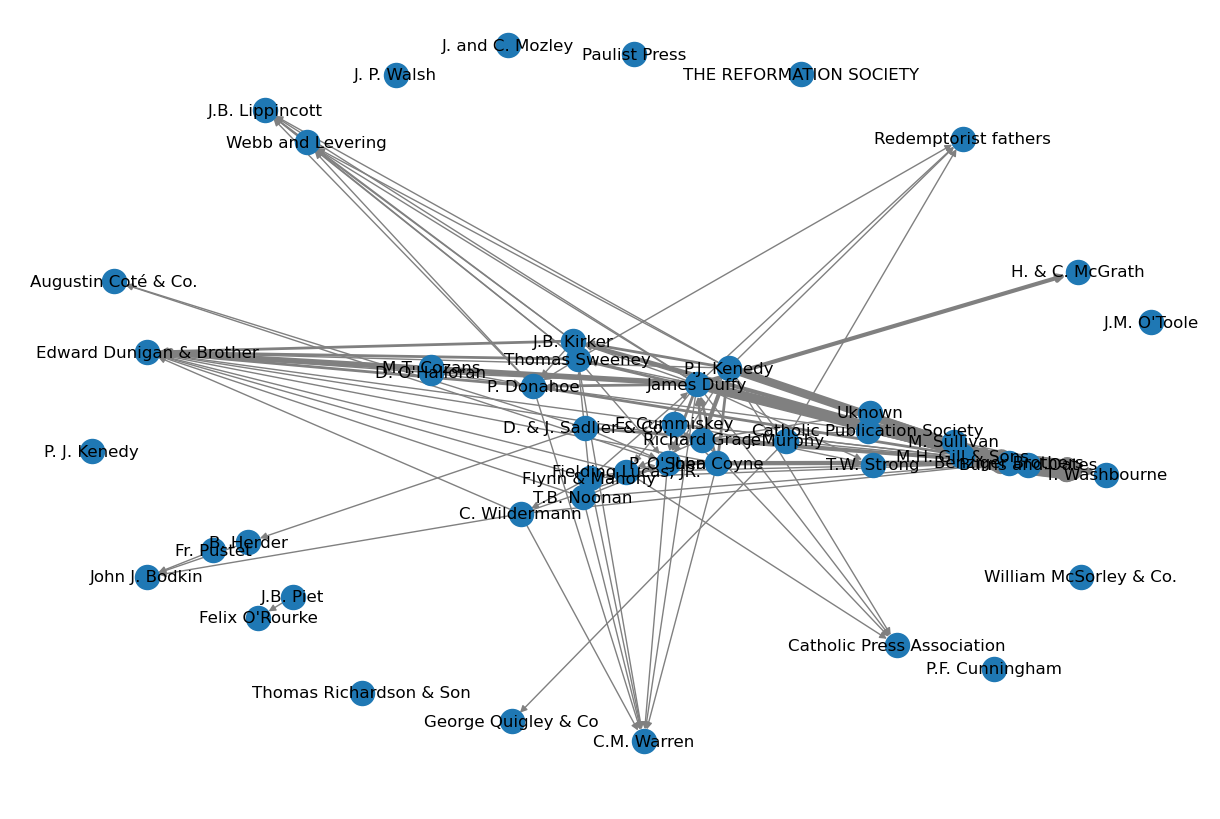

In [120]:
plt.figure(figsize=(12, 8))

pos = nx.spring_layout(G_combined)

edge_widths = [data['weight'] for _, _, data in G_combined.edges(data=True)]

nx.draw(G_combined, pos, with_labels=True, width=edge_widths, edge_color='gray', arrows=True)

plt.savefig('Pietra_Margento_19th_Cent_Liguori_EN_graph_updated.png')

plt.show()

In [24]:
plt.savefig('Pietra_19th_Cent_Liguori_EN_graph.png')

<Figure size 640x480 with 0 Axes>

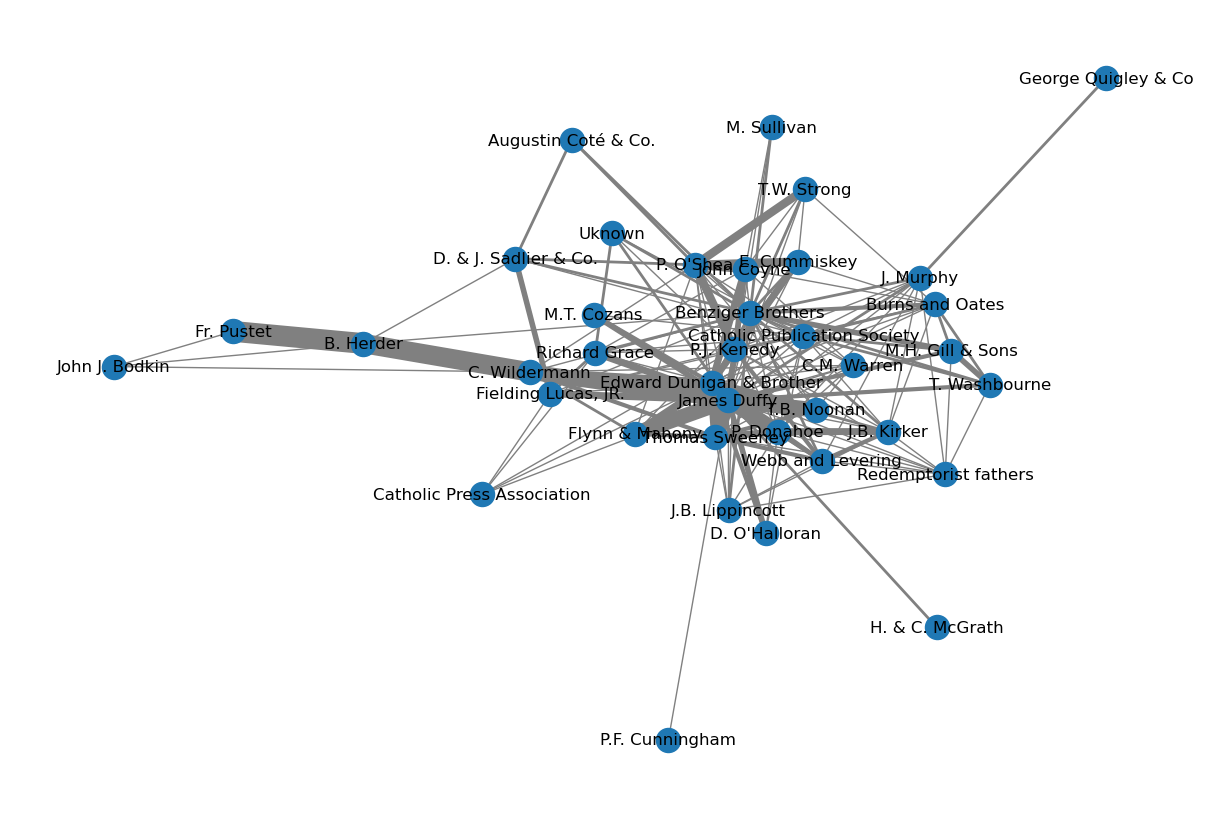

In [46]:
main_component = max(nx.connected_components(G_combined), key=len)
G_main = G_combined.subgraph(main_component)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_main)
edge_widths = [data['weight'] for _, _, data in G_main.edges(data=True)]
nx.draw(G_main, pos, with_labels=True, width=edge_widths, edge_color='gray')

# Save the plot as a standalone file (e.g., PNG format)
plt.savefig('Pietra_Margento_19th_Cent_Liguori_EN_main_component_graph_updated.png')

# Display the plot
plt.show()

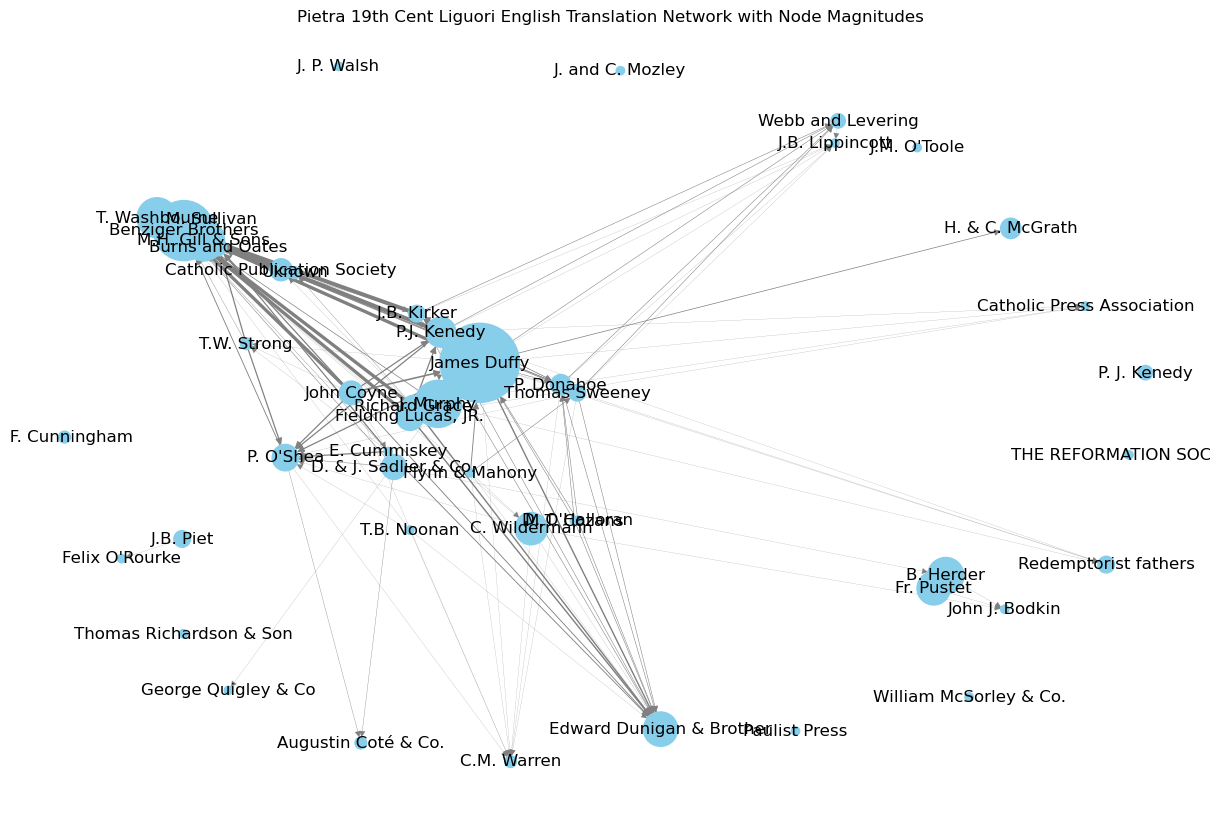

In [149]:
#import networkx as nx
#import matplotlib.pyplot as plt

G_combined = nx.DiGraph()

for u, v, data in G11.edges(data=True):
    if G_combined.has_edge(u, v):
        # If the edge exists, update the weight attribute by adding the current edge's weight
        G_combined[u][v]['weight'] += data['weight']
    else:
        G_combined.add_edge(u, v, weight=data['weight'])

    if not G_combined.has_node(u):
        G_combined.add_node(u, magnitude=G.nodes[u].get('magnitude', 1))  # Default magnitude to 1 if not present
    else:
        G_combined.nodes[u]['magnitude'] = G.nodes[u].get('magnitude', 1)

    if not G_combined.has_node(v):
        G_combined.add_node(v, magnitude=G.nodes[v].get('magnitude', 1))  # Default magnitude to 1 if not present
    else:
        G_combined.nodes[v]['magnitude'] = G.nodes[v].get('magnitude', 1)

for u, v, data in G_combined.edges(data=True):
    data['weight'] = sum(data['weight'])

for node, data in G11.nodes(data=True):
    if not G_combined.has_node(node):
        G_combined.add_node(node, magnitude=G.nodes[node].get('magnitude', 1))
        
node_sizes = [G_combined.nodes[node].get('magnitude', 1) for node in G_combined.nodes()]

# Scale node sizes for better visualization (adjust scaling factor as needed)
node_sizes = [size * 36 for size in node_sizes]

layout = nx.spring_layout(G_combined)

edge_widths = [data['weight']/8 for _, _, data in G_combined.edges(data=True)]

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(G_combined, pos=layout, node_size=node_sizes, with_labels=True,
        alpha=1, node_color='skyblue', width=edge_widths, edge_color='gray', arrows=True)

plt.title("Pietra 19th Cent Liguori English Translation Network with Node Magnitudes")

plt.savefig('Pietra_Margento_19th_Cent_Liguori_EN_w_Node_Magnitudes.png')

plt.show()


In [123]:
main_component = max(nx.strongly_connected_components(G_combined), key=len)
G_main = G_combined.subgraph(main_component)

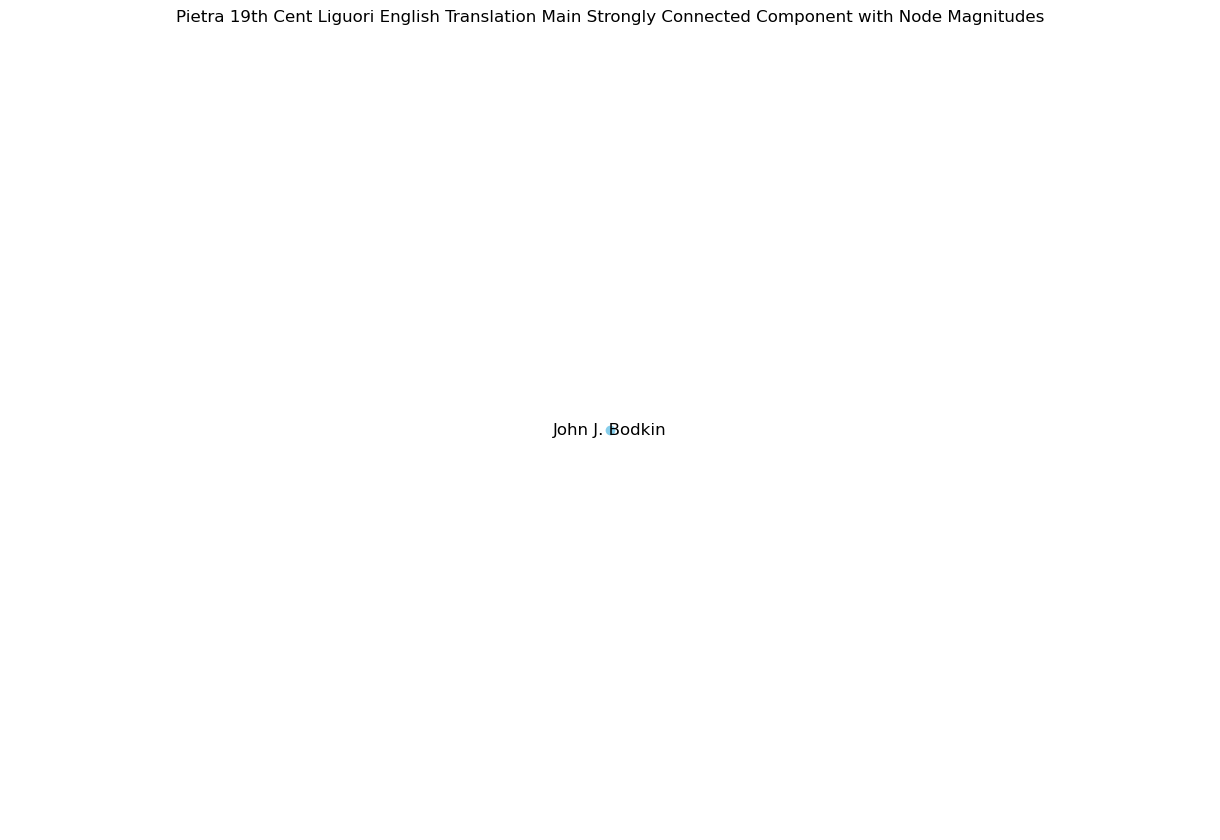

In [124]:
node_sizes = [G_main.nodes[node]['magnitude'] for node in G_main.nodes()]

# Scale node sizes for better visualization (adjust scaling factor as needed)
node_sizes = [size * 36 for size in node_sizes]

layout = nx.spring_layout(G_main)

edge_widths = [data['weight'] for _, _, data in G_main.edges(data=True)]

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(G_main, pos=layout, node_size=node_sizes, with_labels=True,
        alpha=1, node_color='skyblue', width=edge_widths, edge_color='gray', arrows=True)

plt.title("Pietra 19th Cent Liguori English Translation Main Strongly Connected Component with Node Magnitudes")

plt.savefig('Pietra_Margento_19th_Cent_Liguori_EN_Main_Strongly_Connected_Component.png')

plt.show()

In [152]:
main_component = max(nx.weakly_connected_components(G_combined), key=len)
G_main = G_combined.subgraph(main_component)

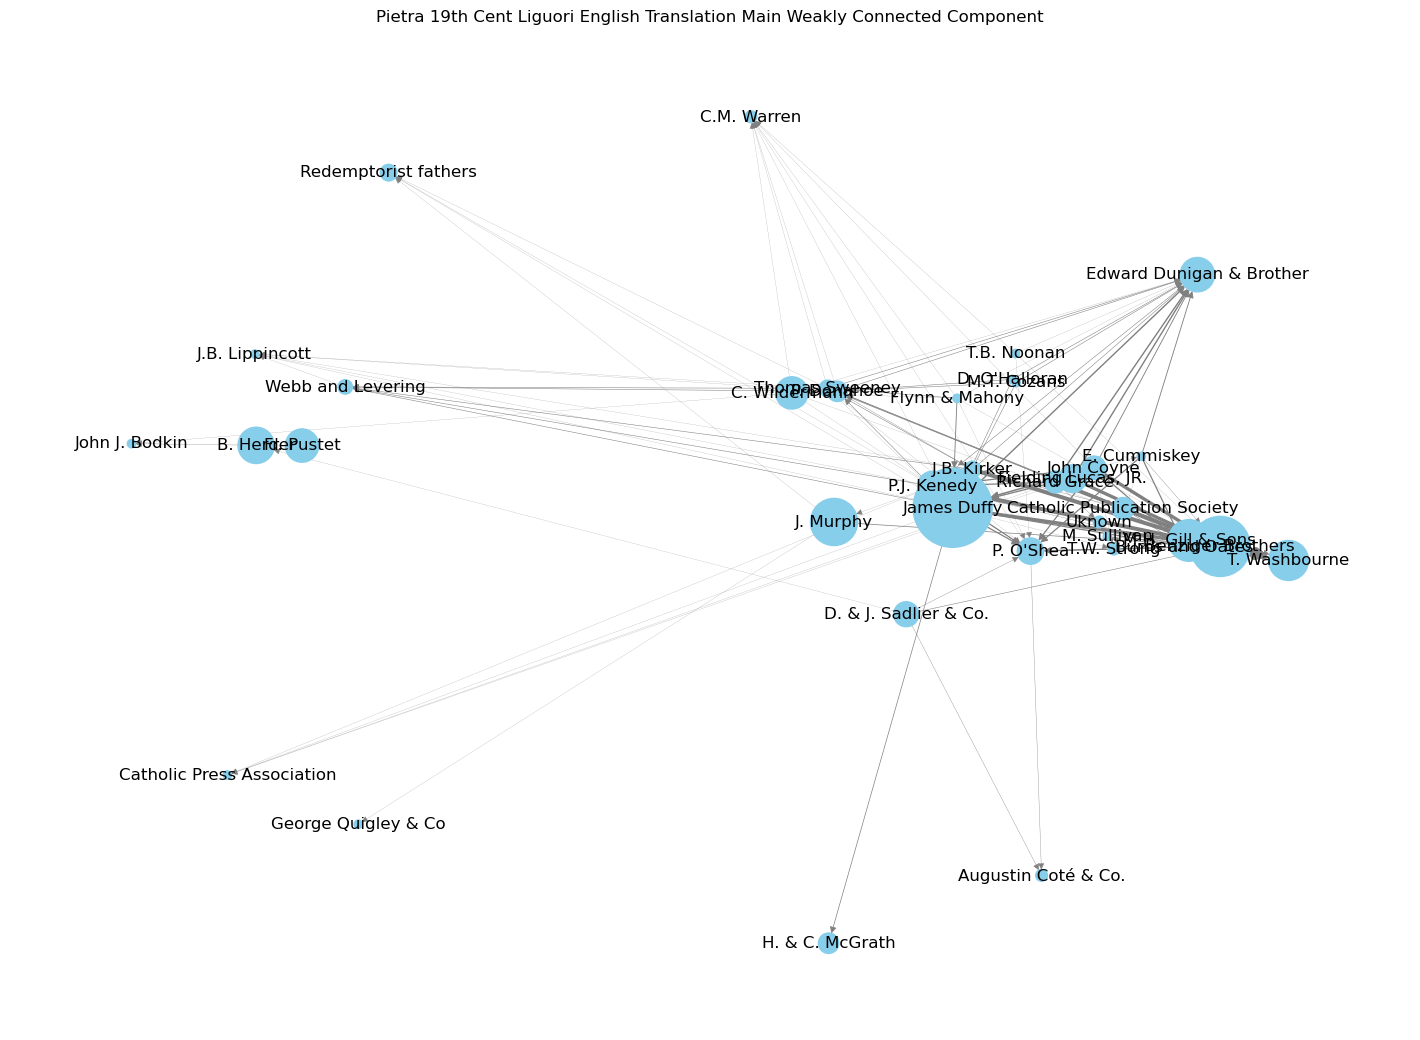

In [153]:
node_sizes = [G_main.nodes[node]['magnitude'] for node in G_main.nodes()]

# Scale node sizes for better visualization (adjust scaling factor as needed)
node_sizes = [size * 36 for size in node_sizes]

layout = nx.spring_layout(G_main)

edge_widths = [data['weight']/8 for _, _, data in G_main.edges(data=True)]

# Plot the graph
plt.figure(figsize=(14, 10))
nx.draw(G_main, pos=layout, node_size=node_sizes, with_labels=True,
        alpha=1, node_color='skyblue', width=edge_widths, edge_color='gray', arrows=True)

plt.title("Pietra 19th Cent Liguori English Translation Main Weakly Connected Component")

plt.savefig('Pietra_Margento_19th_Cent_Liguori_EN_Main_Weakly_Connected_Component.png')

plt.show()